In [16]:
# Starting activity
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# URL do dataset Wine
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

# Nome das colunas em português BR
column_names_pt_br = [
    'classe',
    'alcool',
    'acido_malico',
    'cinzas',
    'alcalinidade_de_cinzas',
    'magnesio',
    'fenois_totais',
    'flavanoides',
    'fenois_nao_flavanoides',
    'proantocianinas',
    'intensidade_de_cor',
    'matiz',
    'od280_od315_de_vinhos_diluidos',
    'prolina'
]

# Ler o arquivo CSV com as colunas especificadas, definindo a coluna 'classe' como object
vinhos = pd.read_csv(url, names=column_names_pt_br, dtype={'classe': object})


k=3, random_state=17 -> Acurácia: 0.97
k=3, random_state=24 -> Acurácia: 0.92
k=5, random_state=17 -> Acurácia: 0.94
k=5, random_state=24 -> Acurácia: 0.92


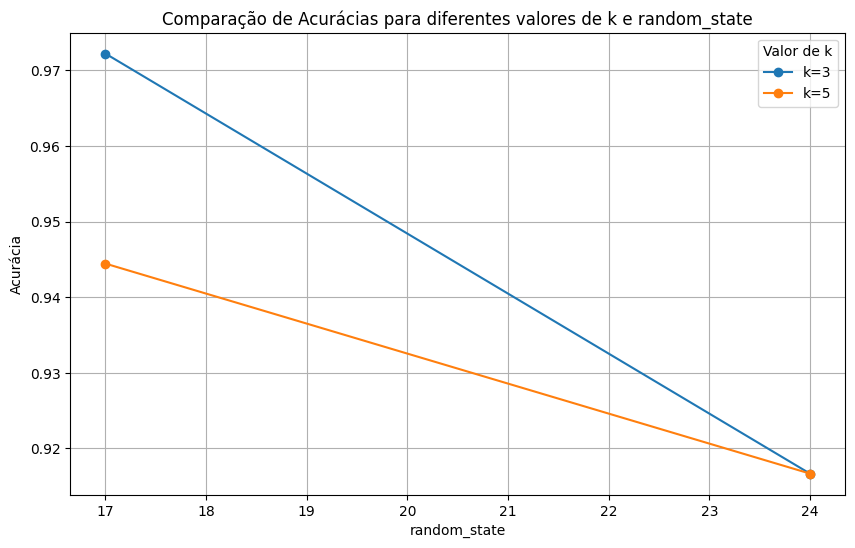


Melhor Desempenho:
Melhor desempenho com k=3 e random_state=17 -> Acurácia: 0.97


In [54]:
# Separate atributes and labels
atributes = vinhos.drop("classe", axis = 1)
labels = vinhos['classe']

# Definir os valores de k e random_state para testar
k_values = [3, 5]
random_state_values = [17, 24]

# Inicializar uma lista para armazenar os resultados
results = []

# Loop para testar as combinações de k e random_state
for k in k_values:
    for random_state in random_state_values:
        # Dividir os dados com o random_state específico
        atributes_train, atributes_test, labels_train, labels_test = train_test_split(atributes, labels, test_size=0.2, random_state=random_state)

        # Normalizar os dados
        scaler = StandardScaler()
        atributes_train_normalized = scaler.fit_transform(atributes_train)
        atributes_test_normalized = scaler.transform(atributes_test)

        # Treinar o modelo KNN
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(atributes_train_normalized, labels_train)

        # Calcular a acurácia
        accuracy = knn.score(atributes_test_normalized, labels_test)

        # Armazenar os resultados
        results.append((k, random_state, accuracy))

# Exibir os resultados
for result in results:
    print(f"k={result[0]}, random_state={result[1]} -> Acurácia: {result[2]:.2f}")

# Plotar a comparação de acurácias
fig, ax = plt.subplots(figsize=(10, 6))
for k in k_values:
    accuracies = [result[2] for result in results if result[0] == k]
    ax.plot(random_state_values, accuracies, marker='o', label=f"k={k}")

ax.set_title("Comparação de Acurácias para diferentes valores de k e random_state")
ax.set_xlabel("random_state")
ax.set_ylabel("Acurácia")
ax.legend(title="Valor de k")
plt.grid(True)
plt.show()

# Encontrar o melhor desempenho geral
best_result = max(results, key=lambda x: x[2])

# Exibir o melhor desempenho
print("\nMelhor Desempenho:")
print(f"Melhor desempenho com k={best_result[0]} e random_state={best_result[1]} -> Acurácia: {best_result[2]:.2f}")
